In [ ]:
# A finance project focus on exploratory data analysis of stock prices. 
#Showing visualisation and pandas skills.
#We'll focus on bank stocks and see how they porogressed throughout the financial crisis all the way to early 2016

In [ ]:
#Read data from Google finance using pandas

In [199]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
%matplotlib inline
from datetime import datetime

In [25]:
start_date = datetime(2006,1,1)
end_date = datetime(2016,1,1)

In [287]:
tickers = ["BAC","C", "GS", "JPM", "MS", "WFC"]


In [365]:
dataframe_dict = {}

for ticker in tickers:
    dataframe_dict[ticker] = data.DataReader(ticker, 'yahoo', start_date, end_date)
    

In [84]:
bank_stocks = pd.concat(dataframe_dict, axis=1)

In [85]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']                        

In [93]:
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   35.298687  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   34.923801  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   34.968796  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   34.916302  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   34.938789  487.399994  483.000000  486.000000  483.899994  ...   

Bank Ticker         MS                                         WFC             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  37.758644  31.975000  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  37.784546  31.820000  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  37.888165  31.555000  31.309999   
2006-01-06   58.770000  58.570000  6889800.0  37.927017  31.775000  31.385000   
2006-01-09   58.630001  59.189999  4144500.0  38.328484  31.825001  31.555000   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  20.823185  
2006-01-04   31.799999  31.530001  10870000.0  20.581659  
2006-01-05   31.500000  31.495001  10158000.0  20.558811  
2006-01-06   31.580000  31.680000   8403800.0  20.679575  
2006-01-09   31.674999  31.674999   5619600.0  20.676311  

[5 rows x 36 columns]

In [ ]:
#Exploratory Data Analysis

In [103]:
bank_stocks.xs('C', axis=1)


Stock Info,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,493.799988,481.100006,490.000000,492.899994,1537600.0,445.561951
2006-01-04,491.000000,483.500000,488.600006,483.799988,1870900.0,437.335999
2006-01-05,487.799988,484.000000,484.399994,486.200012,1143100.0,439.505585
2006-01-06,489.000000,482.000000,488.799988,486.200012,1370200.0,439.505585
2006-01-09,487.399994,483.000000,486.000000,483.899994,1680700.0,437.426453
...,...,...,...,...,...,...
2015-12-24,52.970001,52.450001,52.480000,52.709999,4671200.0,48.647655
2015-12-28,52.570000,51.959999,52.570000,52.380001,8761700.0,48.343086
2015-12-29,53.220001,52.740002,52.759998,52.980000,10155100.0,48.896854


In [110]:
#Max and Min closing price for each bank
bank_stocks.xs('Close', axis=1, level=1).max().round(2)

Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

In [285]:
bank_stocks.xs('Close', axis=1, level=1).min().round(2)

BAC     3.14
C      10.20
GS     52.00
JPM    15.90
MS      9.20
WFC     8.12
dtype: float64

In [112]:
bank_stocks.xs('Close', axis=1, level=1)

Bank Ticker,BAC,C,GS,JPM,MS,WFC
Date,,,,,,
2006-01-03,47.080002,492.899994,128.869995,40.189999,58.310001,31.900000
2006-01-04,46.580002,483.799988,127.089996,39.619999,58.349998,31.530001
2006-01-05,46.639999,486.200012,127.040001,39.740002,58.509998,31.495001
2006-01-06,46.570000,486.200012,128.839996,40.020000,58.570000,31.680000
2006-01-09,46.599998,483.899994,130.389999,40.669998,59.189999,31.674999
...,...,...,...,...,...,...
2015-12-24,17.270000,52.709999,182.470001,66.599998,32.480000,54.820000
2015-12-28,17.129999,52.380001,181.619995,66.379997,32.169998,54.680000
2015-12-29,17.280001,52.980000,183.529999,67.070000,32.549999,55.290001


In [115]:
#Equation for returns
returns = (bank_stocks.xs('Close', axis=1, level=1) / bank_stocks.xs('Open', axis=1, level=1)) - 1

In [ ]:
#Checking the column names at level 0 in dataframe
list(bank_stocks.columns.levels[0])

In [292]:
# adding data to empty dataframe
returns = pd.DataFrame()
for  ticker in list (bank_stocks.columns.levels[0]):
    returns[ticker +' Return'] = bank_stocks[ticker]['Adj Close'].pct_change()

In [293]:
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.005772,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012031,0.016242,0.010585,-0.000158


In [284]:
returns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2006-01-03 to 2015-12-31
Data columns (total 6 columns):
BAC Return    2516 non-null float64
C Return      2516 non-null float64
GS Return     2516 non-null float64
JPM Return    2516 non-null float64
MS Return     2516 non-null float64
WFC Return    2516 non-null float64
dtypes: float64(6)
memory usage: 137.6 KB


,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
BAC Return,1.000000,0.803331,0.686286,0.815963,0.647510,0.828737
C Return,0.803331,1.000000,0.668673,0.739718,0.636966,0.717906
GS Return,0.686286,0.668673,1.000000,0.739374,0.808663,0.663235
JPM Return,0.815963,0.739718,0.739374,1.000000,0.650544,0.826866
MS Return,0.647510,0.636966,0.808663,0.650544,1.000000,0.602959
WFC Return,0.828737,0.717906,0.663235,0.826866,0.602959,1.000000


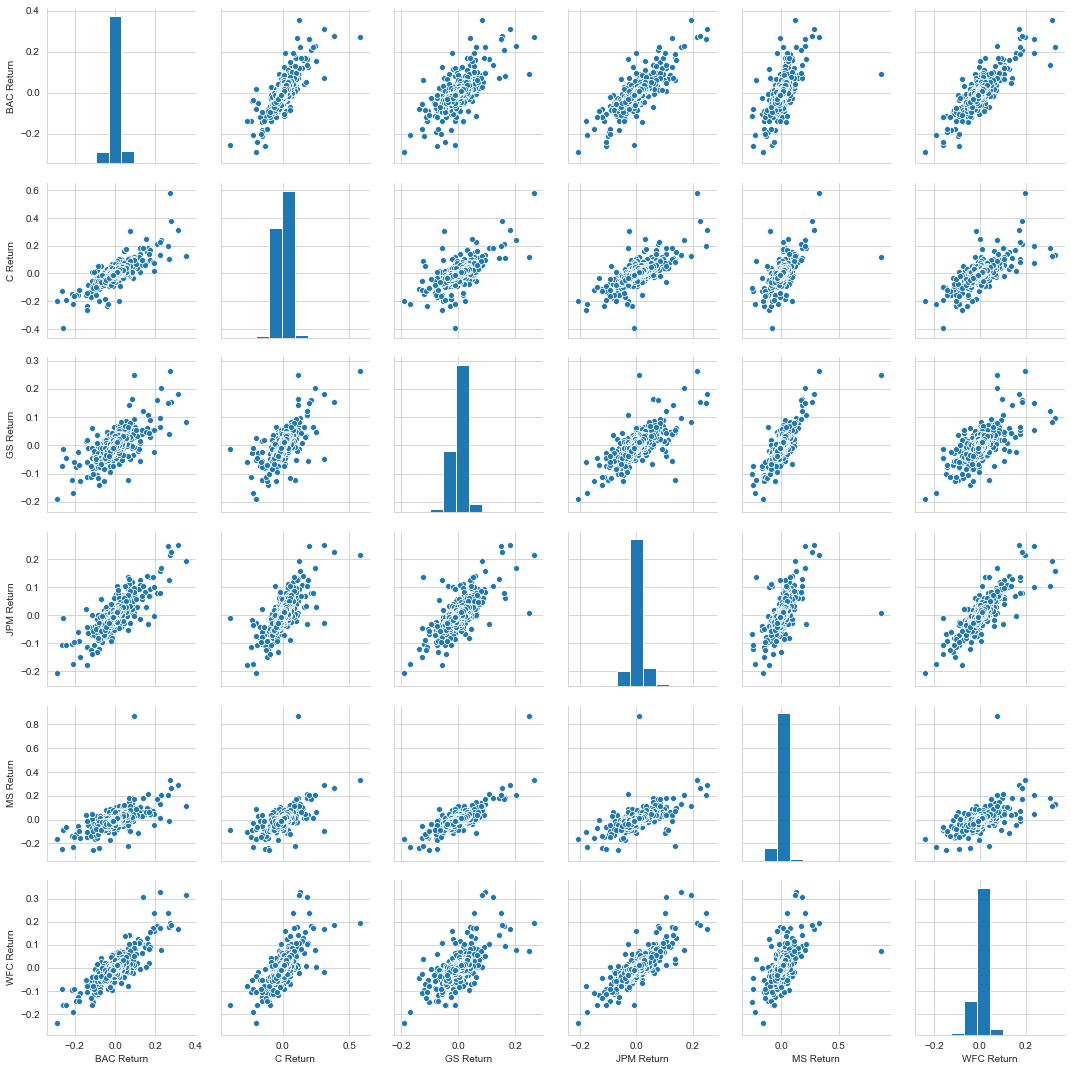

In [367]:
pp = sns.pairplot(returns[1:])


In [ ]:
#We can JPM and BAC has the higest return distribution. We also see CitiGROUP is mostly centrered around 0, because 
#of the financial crisis
#MS is left skewed

In [295]:
returns.idxmin()
#On the day of Obama's inauguration, 4 stocks had their lowest return

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

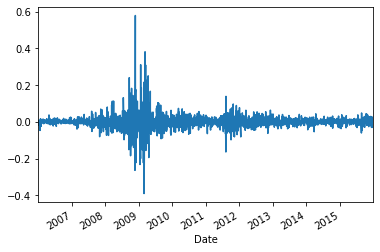

In [281]:
returns['C Return'].plot()

In [296]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

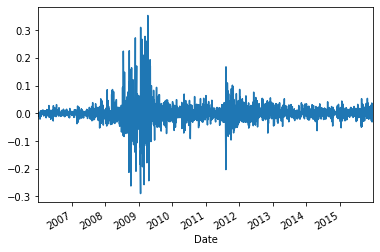

In [282]:
returns['BAC Return'].plot()

In [297]:
#We see the highest standard deviation is Citi groups, which means their share is the most risky
#Least risky is Goldman Sachs
returns.std()

BAC Return    0.036659
C Return      0.038671
GS Return     0.025386
JPM Return    0.027675
MS Return     0.037718
WFC Return    0.030197
dtype: float64

In [301]:
import datetime as dt
std_2015 = returns[returns.index.year == 2015].std()
std_2015

BAC Return    0.016174
C Return      0.015288
GS Return     0.014043
JPM Return    0.014006
MS Return     0.016287
WFC Return    0.012552
dtype: float64

In [307]:
mg_2015 = returns['MS Return'][returns.index.year == 2015]

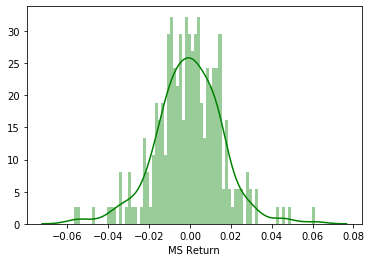

In [314]:
#We can see the Morgan Stanley returns are normally distributed
sns.distplot(mg_2015, bins=80, color="g")


In [315]:
citiGroup_2008 = returns['C Return'][returns.index.year == 2008]

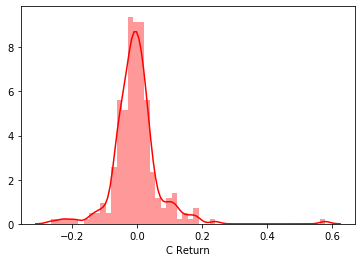

In [317]:
#Looking at the CitiGroup plot, their standard deviation is more stretched out, 10x more than Morgan Stanley
sns.distplot(citiGroup_2008, bins=50, color="r")

In [ ]:
#More Visualisation

In [318]:
sns.set_style('whitegrid')
# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

In [321]:
close_price = bank_stocks.xs('Close', axis=1, level=1).round(2)

In [322]:
close_price.head()

,BAC,C,GS,JPM,MS,WFC
Date,,,,,,
2006-01-03,47.08,492.9,128.87,40.19,58.31,31.90
2006-01-04,46.58,483.8,127.09,39.62,58.35,31.53
2006-01-05,46.64,486.2,127.04,39.74,58.51,31.50
2006-01-06,46.57,486.2,128.84,40.02,58.57,31.68
2006-01-09,46.60,483.9,130.39,40.67,59.19,31.67


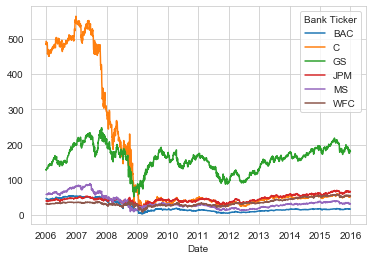

In [337]:
plt.plot(close_price)
plt.xlabel('Date')
plt.legend(tickers, loc= 'upper right', title= 'Bank Ticker')

In [ ]:
#From the plot above we can see that something happened in 2009 and Citi Group took the worst hit

In [ ]:
#Moving Averages

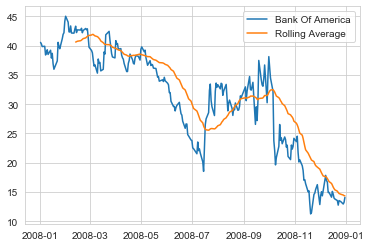

In [350]:
BOC_2008 = bank_stocks['BAC']['Close'][bank_stocks.index.year == 2008]
rolling_mean = BOC_2008.rolling(window=30).mean()
plt.plot(BOC_2008, label = 'Bank Of America')
plt.plot(rolling_mean, label = 'Rolling Average')
plt.legend()

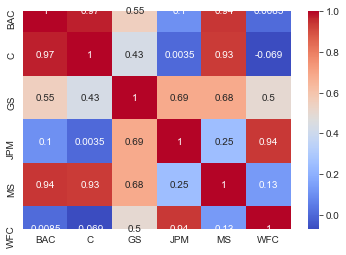

In [360]:
close_corr = close_price.corr()
sns.heatmap(close_corr, cmap= 'coolwarm' , annot= True)

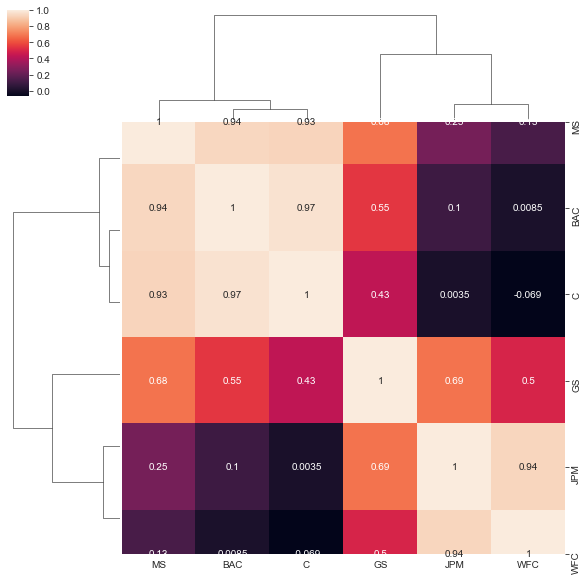

In [363]:
#we see that JPM, WFC and GS correlate with one another compare to C, BAC and MS
sns.clustermap(close_corr, annot= True)